# Welcome to the EEweather Tutorial

This tutorial is pretty minimal for now, but it demonstrates loading and using eeweather for the simple task of finding a nearby weather station (using lat/long coordinates) and loading temperature data for that station.

In [1]:
# show plots in notebook
%matplotlib inline

# allows making edits to code
%load_ext autoreload
%autoreload 2

In [2]:
import datetime
import json

import matplotlib.pyplot as plt
import pytz

import eeweather

In [3]:
%%javascript
/* 
   OPTIONAL - Run this to get your approximate coordinates for use below.
   Uses your browser's IP and a free external service.
*/
var xhr = new XMLHttpRequest();
xhr.open('GET', '//freegeoip.net/json/');
xhr.onload = function() {
    if (xhr.status === 200) {
        var output = JSON.parse(xhr.responseText);
        element.text('Your (very roughly approximate) coordinates: (' + output.latitude + ', '+ output.longitude + ')');
    }
};
xhr.send();

<IPython.core.display.Javascript object>

In [4]:
# default coordinates are in downtown chicago
# replace with your own coordinates from above if you'd like
lat, long = (41.8781, -87.6298)

In [5]:
# returned result is an object
result = eeweather.match_lat_long(lat, long)
result

ISDStationMapping('725340')

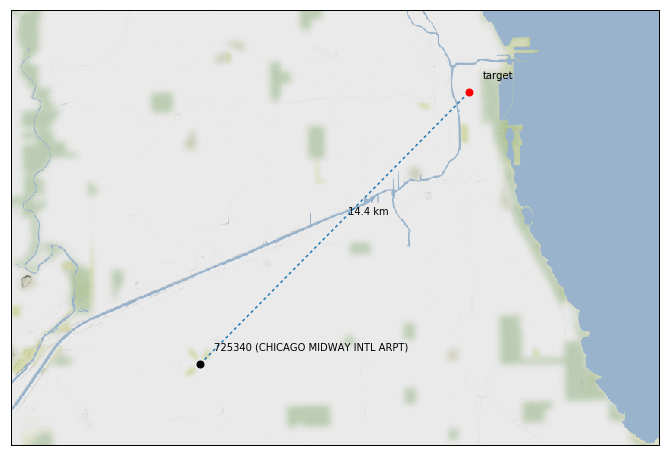

In [6]:
# plot match
result.plot()

In [7]:
# get match distance
result.distance_meters

14411

In [8]:
# get station object from result
station = result.isd_station
station

ISDStation('725340')

In [9]:
# view station data
print(json.dumps(station.json(), indent=2))

{
  "elevation": 186.5,
  "latitude": 41.786,
  "longitude": -87.752,
  "name": "CHICAGO MIDWAY INTL ARPT",
  "quality": "high",
  "wban_ids": [
    "14819"
  ],
  "recent_wban_id": "14819",
  "climate_zones": {
    "iecc_climate_zone": "5",
    "iecc_moisture_regime": "A",
    "ba_climate_zone": "Cold",
    "ca_climate_zone": null
  }
}


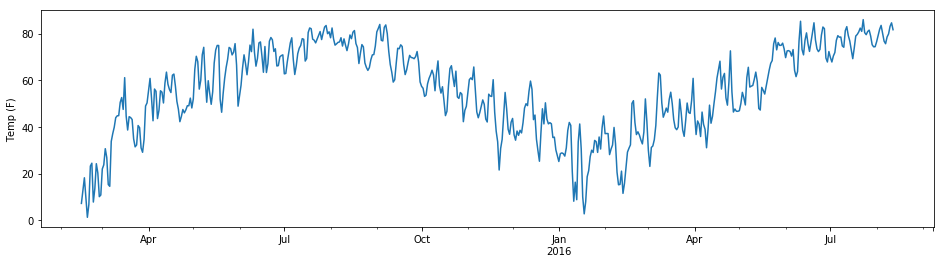

In [10]:
# pull temperature data over a range - make sure to use tz-aware datetimes!
start = datetime.datetime(2015, 2, 15, tzinfo=pytz.UTC)
end = datetime.datetime(2016, 8, 12, tzinfo=pytz.UTC)
temp_C = station.load_isd_daily_temp_data(start, end)
temp_F = temp_C * 1.8 + 32  # convert from Celsius to Fahrenheit
ax = temp_F.plot(figsize=(16,4))
ax.set_ylabel('Temp (F)')
plt.show()

In [11]:
# see raw data files
station.get_isd_filenames(with_host=True)

['ftp://ftp.ncdc.noaa.gov/pub/data/noaa/2006/725340-14819-2006.gz',
 'ftp://ftp.ncdc.noaa.gov/pub/data/noaa/2007/725340-14819-2007.gz',
 'ftp://ftp.ncdc.noaa.gov/pub/data/noaa/2008/725340-14819-2008.gz',
 'ftp://ftp.ncdc.noaa.gov/pub/data/noaa/2009/725340-14819-2009.gz',
 'ftp://ftp.ncdc.noaa.gov/pub/data/noaa/2010/725340-14819-2010.gz',
 'ftp://ftp.ncdc.noaa.gov/pub/data/noaa/2011/725340-14819-2011.gz',
 'ftp://ftp.ncdc.noaa.gov/pub/data/noaa/2012/725340-14819-2012.gz',
 'ftp://ftp.ncdc.noaa.gov/pub/data/noaa/2013/725340-14819-2013.gz',
 'ftp://ftp.ncdc.noaa.gov/pub/data/noaa/2014/725340-14819-2014.gz',
 'ftp://ftp.ncdc.noaa.gov/pub/data/noaa/2015/725340-14819-2015.gz',
 'ftp://ftp.ncdc.noaa.gov/pub/data/noaa/2016/725340-14819-2016.gz',
 'ftp://ftp.ncdc.noaa.gov/pub/data/noaa/2017/725340-14819-2017.gz',
 'ftp://ftp.ncdc.noaa.gov/pub/data/noaa/2018/725340-14819-2018.gz']

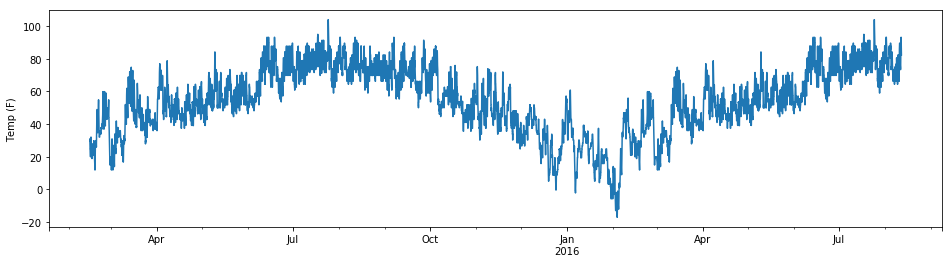

In [48]:
# pull normalized TMY3 temperature data over a range - make sure to use tz-aware datetimes!
start = datetime.datetime(2015, 2, 15, tzinfo=pytz.UTC)
end = datetime.datetime(2016, 8, 12, tzinfo=pytz.UTC)
temp_C = station.load_tmy3_hourly_temp_data(start, end)
temp_F = temp_C * 1.8 + 32  # convert from Celsius to Fahrenheit
ax = temp_F.plot(figsize=(16,4))
ax.set_ylabel('Temp (F)')
plt.show()